In [1]:
# Import the librarues

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from com_in_nitin.utils import DFboxplot,DFdistplot,removeOutier

from sklearn.model_selection import train_test_split,GridSearchCV,GridSearchCV,KFold
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

import keras


In [3]:
# import the dataset
data=sns.load_dataset("penguins")

In [4]:
# go through the data ie. data anlysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

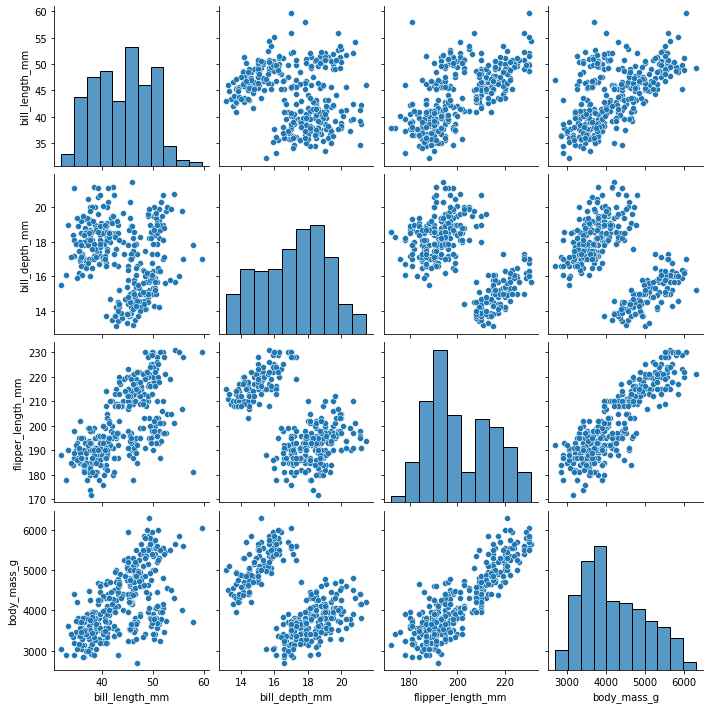

In [9]:
sns.pairplot(data)

ValueError: num must be 1 <= num <= 3, not 4

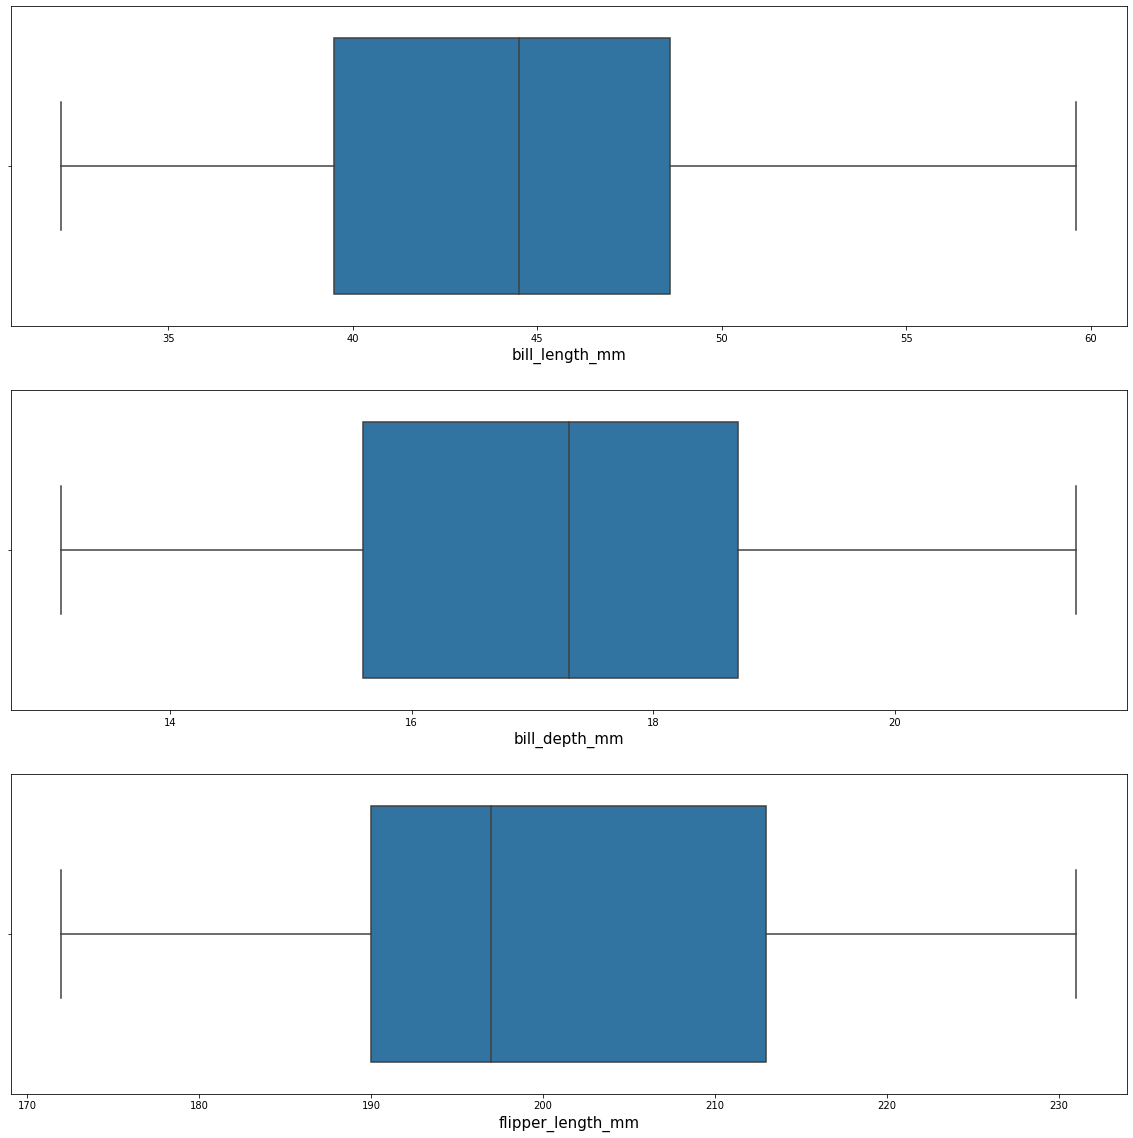

In [11]:
DFboxplot(data)

ValueError: num must be 1 <= num <= 3, not 4

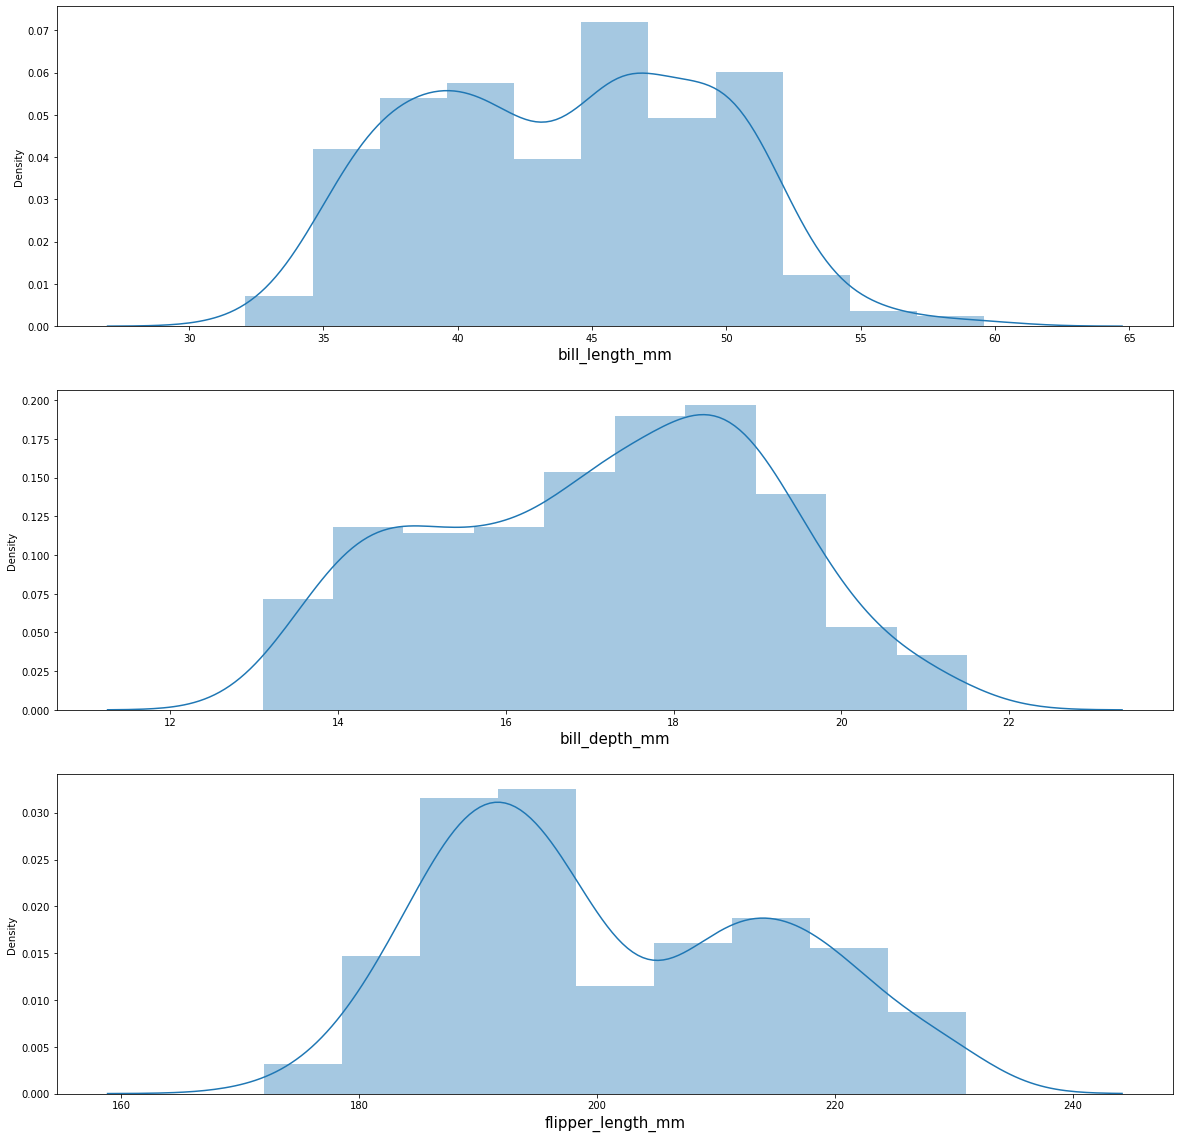

In [10]:
DFdistplot(data)

In [11]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [12]:
data.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
data["species"].uniqueque()

In [ ]:
data["island"].unique()

In [ ]:
data["sex"].unique()

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

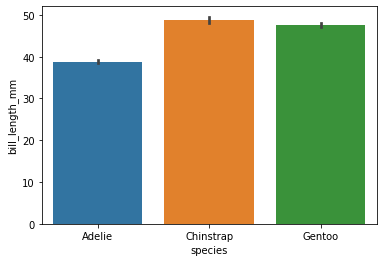

In [15]:
sns.barplot(data=data,x="species",y="bill_length_mm")

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

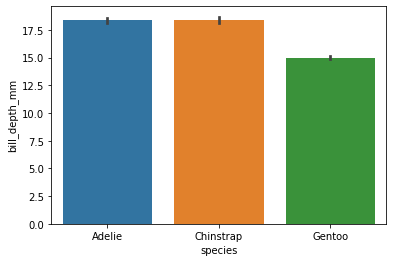

In [16]:
sns.barplot(data["species"],data["bill_depth_mm"])

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

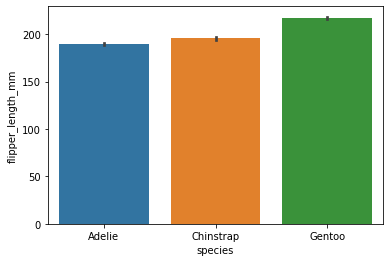

In [17]:
sns.barplot(data["species"],data["flipper_length_mm"])

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

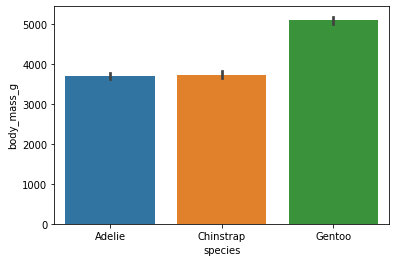

In [18]:
sns.barplot(data["species"],data["body_mass_g"])

<AxesSubplot:>

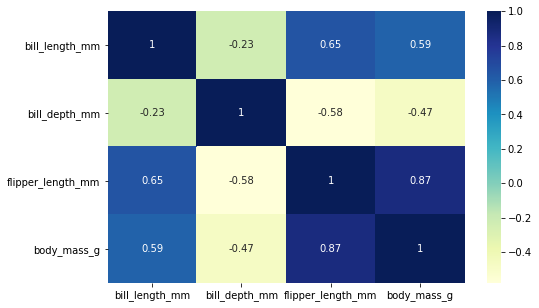

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)

In [86]:
g=data.groupby(["island","species","sex"]).species.agg(['count'])

KeyError: 'island'

In [14]:
g

count
island    species   sex          
Biscoe    Adelie    Female     22
                    Male       22
          Gentoo    Female     58
                    Male       61
Dream     Adelie    Female     27
                    Male       28
          Chinstrap Female     34
                    Male       34
Torgersen Adelie    Female     24
                    Male       23

In [15]:
data=pd.get_dummies(data,columns=["island","sex"],drop_first=True)

In [ ]:
sc=StandardScaler()
col=X.columns
X=pd.DataFrame(sc.fit_transform(X),columns=col)

In [74]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

In [76]:
# creating tain test split
X_train,X_test,y_train,y_test=train_test_split(X,dummy_y,test_size=.20,random_state=45)

In [52]:
## now lets begin with creating neural network

In [77]:
from keras.models import Sequential
model=Sequential()
model.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=7))
model.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=3,kernel_initializer='uniform',activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=["accuracy"],optimizer='adam')

model.summary()


In [80]:
model.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 2ms/step - loss: 1.0522 - accuracy: 0.4662
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.9231 - accuracy: 0.6090
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.7915 - accuracy: 0.6917
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.7895
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.8195
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8910
Epoch 7/100
27/27 [==============================] - 0s 1ms/step - loss: 0.3249 - accuracy: 0.9436
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.9586
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9699
Epoch 10/100
27/27 [==============================] - 0s 1ms/step - loss: 0.1892 - accuracy: 0.9699
Epoch 11/

27/27 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 84/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0076 - accuracy: 0.9962
Epoch 85/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 86/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 87/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 88/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 89/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 90/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 91/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 92/100
27/27 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 93/100


In [87]:
y_pred=model.predict(X_test)

In [109]:
for i in range(0,y_pred.shape[0]):
    m=max(y_pred[i])
    if y_pred[i][0]==m:
        y_pred[i][0]=1
        y_pred[i][1]=0
        y_pred[i][2]=0
    elif y_pred[i][1]==m:
        y_pred[i][0]=0
        y_pred[i][1]=1
        y_pred[i][2]=0
    else:
        y_pred[i][0]=0
        y_pred[i][1]=0
        y_pred[i][2]=1
        
        

In [112]:
accuracy_score(y_test,y_pred)*100

100.0